# Assignment 1 by Subham Agrawal (23B3919)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Question 1


In [2]:
matrix = np.random.randint(1, 101, size=(5,5))
print(matrix)

[[45 83 76 37 48]
 [33 48 86 79 18]
 [23 50 16 47 28]
 [88  2 22 30 73]
 [80 33  2 36 34]]


### (a) 

In [3]:
matrix[2,2]

16

### (b) 

In [4]:
i = 0
while i < 5:
  print("Mean of Row " + str(i+1) + ": " +str(matrix[i,:].mean()))
  i += 1

Mean of Row 1: 57.8
Mean of Row 2: 52.8
Mean of Row 3: 32.8
Mean of Row 4: 43.0
Mean of Row 5: 37.0


### (c)


In [5]:
new_matrix = []
for _ in matrix:
    for j in _:
        if (j>(matrix.mean())):
            new_matrix.append(j)
print(new_matrix)

[45, 83, 76, 48, 48, 86, 79, 50, 47, 88, 73, 80]


### (d)

In [6]:
def spiral_order(matrix):
    result = []
    seen = [[False] * 5 for _ in range(5)]
    nr = [0, 1, 0, -1]
    nc = [1, 0, -1, 0]
    r, c = 0, 0
    ni = 0
    for i in range(25):
        result.append(matrix[r][c])
        seen[r][c] = True
        newR, newC = r + nr[ni], c + nc[ni]
        if 0 <= newR < 5 and 0 <= newC < 5 and not seen[newR][newC]:
            r, c = newR, newC
        else:
            ni = (ni + 1) % 4
            r += nr[ni]
            c += nc[ni]
    return result

res = spiral_order(matrix)
print("Spiral order:", res)
    

Spiral order: [45, 83, 76, 37, 48, 18, 28, 73, 34, 36, 2, 33, 80, 88, 23, 33, 48, 86, 79, 47, 30, 22, 2, 50, 16]


## Question 2 

In [7]:
df = pd.read_csv('videogamesales.csv')

### (a) 


In [8]:
df['global_sales'] = df['NA_Sales'] + df['EU_Sales'] + df['JP_Sales'] + df['Other_Sales'] 
df = df.sort_values('global_sales', ascending = False) 
df 

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,global_sales
6109,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
122,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
8315,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.83
9743,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
705,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.38
...,...,...,...,...,...,...,...,...,...,...
10978,Military History: Commander - Europe at War,DS,2009.0,Strategy,Slitherine Software,0.00,0.01,0.00,0.00,0.01
7971,Puzzle Quest: Challenge of the Warlords,PSP,2007.0,Puzzle,D3Publisher,0.01,0.00,0.00,0.00,0.01
7972,Race Driver: Create & Race,DS,2007.0,Racing,Codemasters,0.01,0.00,0.00,0.00,0.01
10854,Cross Edge Dash,X360,2009.0,Role-Playing,Compile Heart,0.00,0.00,0.01,0.00,0.01


### (b) 

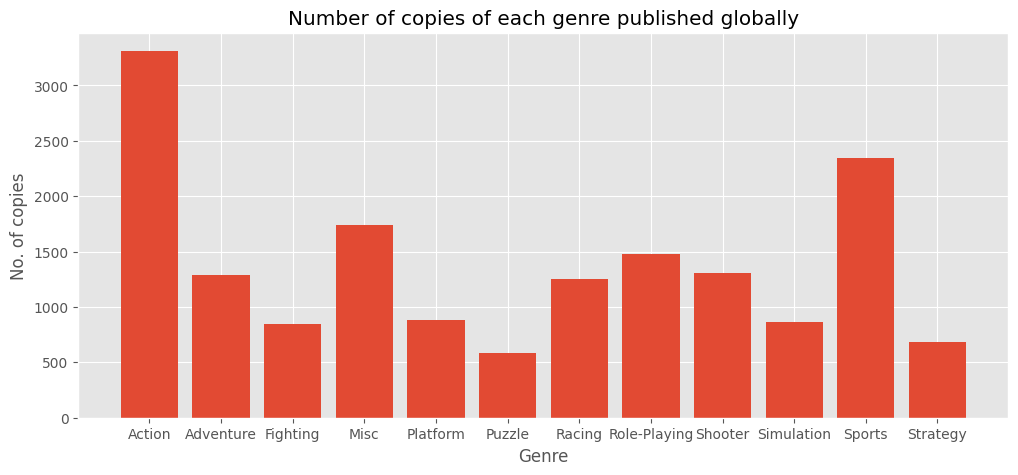

In [9]:
labels = sorted(set(df.Genre.values.tolist()))
values = (df.groupby(['Genre']).count()).Name.values.tolist()

plt.style.use('ggplot')
plt.figure(figsize=(12,5))
plt.title(label='Number of copies of each genre published globally')

bars = plt.bar(labels, values)

plt.xlabel("Genre")
plt.ylabel("No. of copies")
plt.show()

### (c)

In [10]:
new_df = df.loc[df['Name'].str.contains('Grand Theft Auto')]
new_df['EU_and_JP_Sales'] =  new_df['EU_Sales'] + new_df['JP_Sales']
new_df = new_df.sort_values('EU_and_JP_Sales', ascending = False)
new_df.reset_index(drop=True, inplace=True)
new_df2 = new_df
new_df = new_df.drop(columns=['Genre', 'Publisher', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'global_sales'])
new_df

C:\Users\subha\AppData\Local\Temp\ipykernel_64128\3088517888.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['EU_and_JP_Sales'] =  new_df['EU_Sales'] + new_df['JP_Sales']


,Name,Platform,Year,EU_and_JP_Sales
0,Grand Theft Auto V,PS3,2013.0,10.24
1,Grand Theft Auto V,PS4,2014.0,6.17
2,Grand Theft Auto: Vice City,PS2,2002.0,5.96
3,Grand Theft Auto V,X360,2013.0,5.37
4,Grand Theft Auto III,PS2,2001.0,4.81
5,Grand Theft Auto IV,PS3,2008.0,4.20
6,Grand Theft Auto IV,X360,2008.0,3.24
7,Grand Theft Auto: Liberty City Stories,PSP,2005.0,3.07
8,Grand Theft Auto: Vice City Stories,PSP,2006.0,2.18
9,Grand Theft Auto 2,PS,1998.0,2.07


### (d)

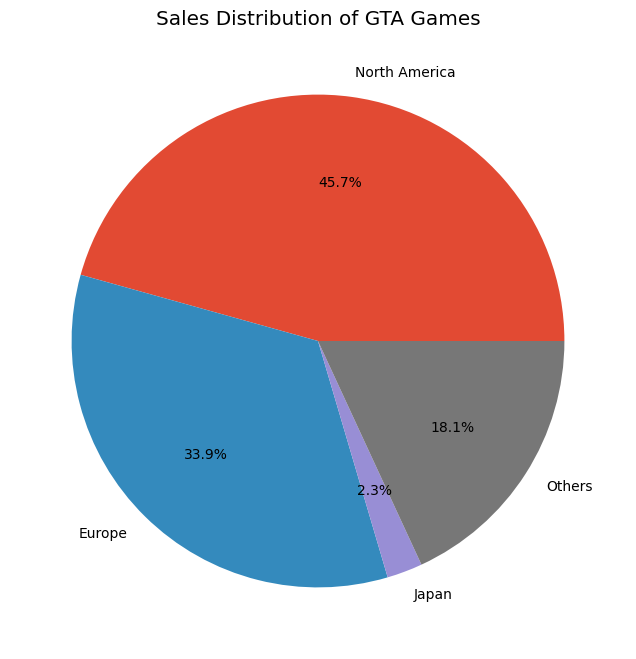

In [11]:
na = new_df2['NA_Sales'].sum()
eu = new_df2['EU_Sales'].sum()
jp = new_df2['JP_Sales'].sum()
oth = new_df2['Other_Sales'].sum()
sales = [na, eu, jp, oth]
labels = ['North America','Europe', 'Japan', 'Others']

plt.figure(figsize=(8,8))
plt.title('Sales Distribution of GTA Games')
plt.pie(sales, labels=labels, autopct='%.1f%%', pctdistance=0.65)

plt.show()